In [4]:
import mxnet as mx
# 把mnist的四个文件放到ipynb的根目录中
mnist = mx.test_utils.get_mnist()

### 准备数据和数据迭代器

In [15]:
batch_size = 128
train_iter = mx.io.NDArrayIter(data=mnist['train_data'],
                               label=mnist['train_label'],
                               batch_size=batch_size, 
                               shuffle=True)

eval_iter = mx.io.NDArrayIter(data=mnist['test_data'],
                              label=mnist['test_label'],
                              batch_size=batch_size,
                              shuffle=False)

### 开始训练
#### 神经网络

In [8]:
data = mx.sym.Variable('data')
# Flatten the data from 4-D shape into 2-D(batch_size, num_channel*width*height)
data = mx.sym.flatten(data=data)

In [9]:
# fc1
fc1 = mx.sym.FullyConnected(data=data, num_hidden=128)
act1 = mx.sym.Activation(data=fc1, act_type='relu')

# fc2
fc2 = mx.sym.FullyConnected(data=act1, num_hidden=64)
act2 = mx.sym.Activation(data=fc2, act_type='relu')

# fc3
fc3 = mx.sym.FullyConnected(data=act2, num_hidden=10)
mlp = mx.sym.SoftmaxOutput(data=fc3, name='softmax')


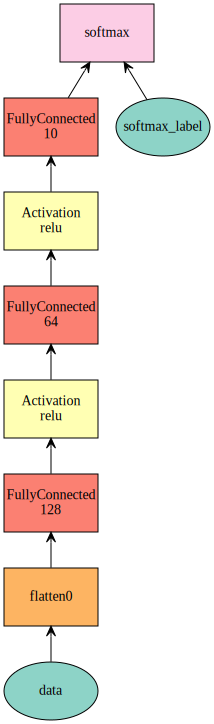

In [10]:
mx.viz.plot_network(mlp)

In [16]:
import logging
logging.getLogger().setLevel(logging.DEBUG)
# create a trainable module on CPU
mlp_model = mx.mod.Module(symbol=mlp, context=mx.cpu())
mlp_model.fit(train_data=train_iter,
              eval_data=eval_iter,
              optimizer='sgd',
              optimizer_params={'learning_rate':0.1},
              eval_metric='acc',
              batch_end_callback=mx.callback.Speedometer(batch_size, 128),
              num_epoch=10)

INFO:root:Epoch[0] Batch [128]	Speed: 34872.80 samples/sec	accuracy=0.112585
INFO:root:Epoch[0] Batch [256]	Speed: 67625.83 samples/sec	accuracy=0.111511
INFO:root:Epoch[0] Batch [384]	Speed: 65809.07 samples/sec	accuracy=0.112427
INFO:root:Epoch[0] Train-accuracy=0.113374
INFO:root:Epoch[0] Time cost=1.159
INFO:root:Epoch[0] Validation-accuracy=0.142009
INFO:root:Epoch[1] Batch [128]	Speed: 42215.67 samples/sec	accuracy=0.281068
INFO:root:Epoch[1] Batch [256]	Speed: 28115.19 samples/sec	accuracy=0.574341
INFO:root:Epoch[1] Batch [384]	Speed: 50213.53 samples/sec	accuracy=0.744568
INFO:root:Epoch[1] Train-accuracy=0.803385
INFO:root:Epoch[1] Time cost=1.564
INFO:root:Epoch[1] Validation-accuracy=0.824268
INFO:root:Epoch[2] Batch [128]	Speed: 45991.19 samples/sec	accuracy=0.830669
INFO:root:Epoch[2] Batch [256]	Speed: 41119.47 samples/sec	accuracy=0.845459
INFO:root:Epoch[2] Batch [384]	Speed: 42595.47 samples/sec	accuracy=0.867065
INFO:root:Epoch[2] Train-accuracy=0.879464
INFO:root:Ep

### Prediction

In [18]:
test_iter = mx.io.NDArrayIter(data=mnist['test_data'],label=None, batch_size=batch_size)
prob = mlp_model.predict(test_iter)

In [28]:
test_iter = mx.io.NDArrayIter(data=mnist['test_data'], label=mnist['test_label'], batch_size=batch_size)
acc = mx.metric.Accuracy()
mlp_model.score(test_iter, acc)
print(acc)
assert acc.get()[1] > 0.96

EvalMetric: {'accuracy': 0.96548655063291144}


In [37]:
data = mx.sym.var('data')
# first conv layer
conv1 = mx.sym.Convolution(data=data, kernel=(5,5), num_filter=20)
tanh1 = mx.sym.Activation(data=conv1, act_type='tanh')
pool1 = mx.sym.Pooling(data=tanh1, pool_type='max', kernel=(2,2), stride=(2,2))

# second conv layer
conv2 = mx.sym.Convolution(data=pool1, kernel=(5,5), num_filter=50)
tanh2 = mx.sym.Activation(data=conv2, act_type='tanh')
pool2 = mx.sym.Pooling(data=tanh2, pool_type='max', kernel=(2,2), stride=(2,2))

# first fc layer
flatten = mx.sym.flatten(data=pool2)
fc1 = mx.sym.FullyConnected(data=flatten, num_hidden=500)
tanh3 = mx.sym.Activation(data=fc1, act_type='tanh')

# second fc layer
fc2 = mx.sym.FullyConnected(data=tanh3, num_hidden=10)
# softmax loss
lenet = mx.sym.SoftmaxOutput(data=fc2, name='softmax')

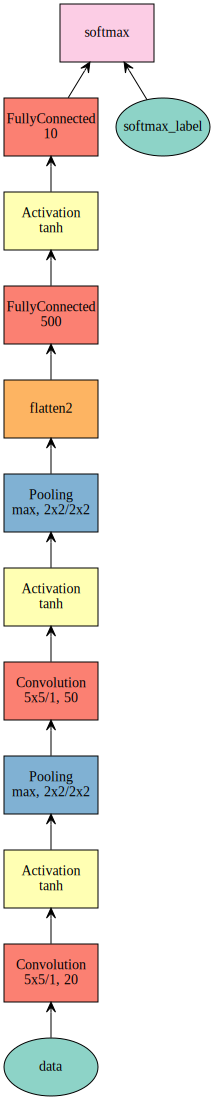

In [38]:
mx.viz.plot_network(lenet)

In [44]:
# create a trainable module on GPU 0
lenet_model = mx.mod.Module(symbol=lenet, context=mx.gpu())
# train with the same
lenet_model.fit(train_data=train_iter,
                eval_data=eval_iter,
                optimizer='sgd', 
                optimizer_params={'learning_rate':0.1},
                eval_metric='acc', 
                batch_end_callback=mx.callback.Speedometer(batch_size, 100),
                num_epoch=100)

INFO:root:Epoch[0] Batch [100]	Speed: 69159.09 samples/sec	accuracy=0.109298
INFO:root:Epoch[0] Batch [200]	Speed: 74617.53 samples/sec	accuracy=0.112109
INFO:root:Epoch[0] Batch [300]	Speed: 78644.08 samples/sec	accuracy=0.115859
INFO:root:Epoch[0] Batch [400]	Speed: 78080.55 samples/sec	accuracy=0.109844
INFO:root:Epoch[0] Train-accuracy=0.113626
INFO:root:Epoch[0] Time cost=0.810
INFO:root:Epoch[0] Validation-accuracy=0.113726
INFO:root:Epoch[1] Batch [100]	Speed: 79574.86 samples/sec	accuracy=0.110845
INFO:root:Epoch[1] Batch [200]	Speed: 79209.74 samples/sec	accuracy=0.113203
INFO:root:Epoch[1] Batch [300]	Speed: 76330.33 samples/sec	accuracy=0.425078
INFO:root:Epoch[1] Batch [400]	Speed: 59999.65 samples/sec	accuracy=0.825547
INFO:root:Epoch[1] Train-accuracy=0.885915
INFO:root:Epoch[1] Time cost=0.826
INFO:root:Epoch[1] Validation-accuracy=0.901503
INFO:root:Epoch[2] Batch [100]	Speed: 78262.43 samples/sec	accuracy=0.906714
INFO:root:Epoch[2] Batch [200]	Speed: 78450.79 samples/

INFO:root:Epoch[18] Time cost=0.755
INFO:root:Epoch[18] Validation-accuracy=0.989320
INFO:root:Epoch[19] Batch [100]	Speed: 81556.99 samples/sec	accuracy=0.996597
INFO:root:Epoch[19] Batch [200]	Speed: 80626.99 samples/sec	accuracy=0.997031
INFO:root:Epoch[19] Batch [300]	Speed: 81374.78 samples/sec	accuracy=0.996719
INFO:root:Epoch[19] Batch [400]	Speed: 77780.66 samples/sec	accuracy=0.997188
INFO:root:Epoch[19] Train-accuracy=0.997013
INFO:root:Epoch[19] Time cost=0.755
INFO:root:Epoch[19] Validation-accuracy=0.989517
INFO:root:Epoch[20] Batch [100]	Speed: 78666.55 samples/sec	accuracy=0.996983
INFO:root:Epoch[20] Batch [200]	Speed: 81156.80 samples/sec	accuracy=0.997500
INFO:root:Epoch[20] Batch [300]	Speed: 78851.65 samples/sec	accuracy=0.997188
INFO:root:Epoch[20] Batch [400]	Speed: 81873.65 samples/sec	accuracy=0.997812
INFO:root:Epoch[20] Train-accuracy=0.997702
INFO:root:Epoch[20] Time cost=0.754
INFO:root:Epoch[20] Validation-accuracy=0.989715
INFO:root:Epoch[21] Batch [100]	S

INFO:root:Epoch[37] Batch [400]	Speed: 79951.94 samples/sec	accuracy=0.999687
INFO:root:Epoch[37] Train-accuracy=0.999655
INFO:root:Epoch[37] Time cost=0.752
INFO:root:Epoch[37] Validation-accuracy=0.990506
INFO:root:Epoch[38] Batch [100]	Speed: 77163.01 samples/sec	accuracy=0.999459
INFO:root:Epoch[38] Batch [200]	Speed: 79972.31 samples/sec	accuracy=0.999844
INFO:root:Epoch[38] Batch [300]	Speed: 81269.33 samples/sec	accuracy=0.999766
INFO:root:Epoch[38] Batch [400]	Speed: 80003.41 samples/sec	accuracy=0.999766
INFO:root:Epoch[38] Train-accuracy=0.999655
INFO:root:Epoch[38] Time cost=0.756
INFO:root:Epoch[38] Validation-accuracy=0.990704
INFO:root:Epoch[39] Batch [100]	Speed: 79143.53 samples/sec	accuracy=0.999459
INFO:root:Epoch[39] Batch [200]	Speed: 83181.51 samples/sec	accuracy=0.999844
INFO:root:Epoch[39] Batch [300]	Speed: 81856.42 samples/sec	accuracy=0.999766
INFO:root:Epoch[39] Batch [400]	Speed: 80191.75 samples/sec	accuracy=0.999844
INFO:root:Epoch[39] Train-accuracy=0.999

INFO:root:Epoch[56] Batch [200]	Speed: 80183.48 samples/sec	accuracy=1.000000
INFO:root:Epoch[56] Batch [300]	Speed: 77175.99 samples/sec	accuracy=1.000000
INFO:root:Epoch[56] Batch [400]	Speed: 74690.72 samples/sec	accuracy=1.000000
INFO:root:Epoch[56] Train-accuracy=1.000000
INFO:root:Epoch[56] Time cost=0.776
INFO:root:Epoch[56] Validation-accuracy=0.990902
INFO:root:Epoch[57] Batch [100]	Speed: 78368.91 samples/sec	accuracy=1.000000
INFO:root:Epoch[57] Batch [200]	Speed: 79714.40 samples/sec	accuracy=1.000000
INFO:root:Epoch[57] Batch [300]	Speed: 79389.77 samples/sec	accuracy=1.000000
INFO:root:Epoch[57] Batch [400]	Speed: 77536.11 samples/sec	accuracy=1.000000
INFO:root:Epoch[57] Train-accuracy=1.000000
INFO:root:Epoch[57] Time cost=0.769
INFO:root:Epoch[57] Validation-accuracy=0.990902
INFO:root:Epoch[58] Batch [100]	Speed: 77245.17 samples/sec	accuracy=1.000000
INFO:root:Epoch[58] Batch [200]	Speed: 76286.73 samples/sec	accuracy=1.000000
INFO:root:Epoch[58] Batch [300]	Speed: 7

INFO:root:Epoch[74] Time cost=0.773
INFO:root:Epoch[74] Validation-accuracy=0.991001
INFO:root:Epoch[75] Batch [100]	Speed: 81275.73 samples/sec	accuracy=1.000000
INFO:root:Epoch[75] Batch [200]	Speed: 80625.29 samples/sec	accuracy=1.000000
INFO:root:Epoch[75] Batch [300]	Speed: 78842.85 samples/sec	accuracy=1.000000
INFO:root:Epoch[75] Batch [400]	Speed: 81680.08 samples/sec	accuracy=1.000000
INFO:root:Epoch[75] Train-accuracy=1.000000
INFO:root:Epoch[75] Time cost=0.749
INFO:root:Epoch[75] Validation-accuracy=0.991001
INFO:root:Epoch[76] Batch [100]	Speed: 78111.90 samples/sec	accuracy=1.000000
INFO:root:Epoch[76] Batch [200]	Speed: 81220.28 samples/sec	accuracy=1.000000
INFO:root:Epoch[76] Batch [300]	Speed: 80600.48 samples/sec	accuracy=1.000000
INFO:root:Epoch[76] Batch [400]	Speed: 81526.52 samples/sec	accuracy=1.000000
INFO:root:Epoch[76] Train-accuracy=1.000000
INFO:root:Epoch[76] Time cost=0.752
INFO:root:Epoch[76] Validation-accuracy=0.991001
INFO:root:Epoch[77] Batch [100]	S

INFO:root:Epoch[93] Batch [400]	Speed: 79159.16 samples/sec	accuracy=1.000000
INFO:root:Epoch[93] Train-accuracy=1.000000
INFO:root:Epoch[93] Time cost=0.762
INFO:root:Epoch[93] Validation-accuracy=0.990902
INFO:root:Epoch[94] Batch [100]	Speed: 78322.95 samples/sec	accuracy=1.000000
INFO:root:Epoch[94] Batch [200]	Speed: 80324.20 samples/sec	accuracy=1.000000
INFO:root:Epoch[94] Batch [300]	Speed: 76366.70 samples/sec	accuracy=1.000000
INFO:root:Epoch[94] Batch [400]	Speed: 79407.03 samples/sec	accuracy=1.000000
INFO:root:Epoch[94] Train-accuracy=1.000000
INFO:root:Epoch[94] Time cost=0.769
INFO:root:Epoch[94] Validation-accuracy=0.990902
INFO:root:Epoch[95] Batch [100]	Speed: 77923.70 samples/sec	accuracy=1.000000
INFO:root:Epoch[95] Batch [200]	Speed: 79488.74 samples/sec	accuracy=1.000000
INFO:root:Epoch[95] Batch [300]	Speed: 77787.76 samples/sec	accuracy=1.000000
INFO:root:Epoch[95] Batch [400]	Speed: 76941.29 samples/sec	accuracy=1.000000
INFO:root:Epoch[95] Train-accuracy=1.000

In [45]:
test_iter = mx.io.NDArrayIter(data=mnist['test_data'], label=None, batch_size=batch_size)
prob = lenet_model.predict(test_iter)
test_iter = mx.io.NDArrayIter(data=mnist['test_data'], label=mnist['test_label'], batch_size=batch_size)

# predict accuracy for lenet
acc = mx.metric.Accuracy()
lenet_model.score(test_iter, acc)
print(acc)
assert acc.get()[1] > 0.98

EvalMetric: {'accuracy': 0.99100079113924056}
